<a href="https://colab.research.google.com/github/natygaol/BOOTCAMP_DSG1/blob/semana06/Ejercicio_random_user.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Paso 1: Importamos librerias

In [2]:
import requests
import numpy as np
import matplotlib.pyplot as plt

paso 2: Extraemos data de la api

In [3]:
url = 'https://randomuser.me/api/?results=30'
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
else:
   print(f"error en solicitud : {response.status_code}")

In [4]:
data

{'results': [{'gender': 'male',
   'name': {'title': 'Mr', 'first': 'Ilarion', 'last': 'Pochinok'},
   'location': {'street': {'number': 3210, 'name': 'Kuharska'},
    'city': 'Chop',
    'state': 'Luganska',
    'country': 'Ukraine',
    'postcode': 33524,
    'coordinates': {'latitude': '78.3906', 'longitude': '-153.3965'},
    'timezone': {'offset': '-8:00',
     'description': 'Pacific Time (US & Canada)'}},
   'email': 'ilarion.pochinok@example.com',
   'login': {'uuid': '7b257f74-72e0-4c22-8922-a7b911ac5f9a',
    'username': 'bigcat686',
    'password': 'maximum',
    'salt': 'Cj3dWiks',
    'md5': '53bbb2efe5cb87a077cb898866bb301d',
    'sha1': '69879edc55449729d239a7467d771a49f2209774',
    'sha256': '0e17907e97160665a24ceac39837decf8cda0b3ca969beda4b8ffc486fca73f2'},
   'dob': {'date': '1970-04-19T08:48:44.795Z', 'age': 54},
   'registered': {'date': '2017-01-14T17:41:11.012Z', 'age': 7},
   'phone': '(066) C67-3966',
   'cell': '(097) Y00-5661',
   'id': {'name': '', 'value':

paso 3: extraer sexo y edad del response

In [5]:
gender = [persona['gender'] for persona in data['results']]
age = [persona['dob']['age'] for persona in data['results']]

gender

In [6]:
age

[54,
 28,
 36,
 49,
 47,
 56,
 33,
 35,
 28,
 79,
 37,
 40,
 76,
 39,
 39,
 73,
 69,
 54,
 52,
 37,
 23,
 70,
 77,
 71,
 33,
 64,
 37,
 40,
 42,
 59]

paso 4: crear matriz de datos con numpy

In [7]:
matriz_datos = np.array([gender,age])
matriz_datos

array([['male', 'male', 'male', 'male', 'female', 'male', 'male', 'male',
        'female', 'female', 'male', 'male', 'female', 'female', 'female',
        'female', 'female', 'male', 'female', 'male', 'female', 'female',
        'male', 'male', 'male', 'male', 'female', 'female', 'female',
        'male'],
       ['54', '28', '36', '49', '47', '56', '33', '35', '28', '79', '37',
        '40', '76', '39', '39', '73', '69', '54', '52', '37', '23', '70',
        '77', '71', '33', '64', '37', '40', '42', '59']], dtype='<U21')

In [8]:
matriz_datos = matriz_datos.T
matriz_datos

array([['male', '54'],
       ['male', '28'],
       ['male', '36'],
       ['male', '49'],
       ['female', '47'],
       ['male', '56'],
       ['male', '33'],
       ['male', '35'],
       ['female', '28'],
       ['female', '79'],
       ['male', '37'],
       ['male', '40'],
       ['female', '76'],
       ['female', '39'],
       ['female', '39'],
       ['female', '73'],
       ['female', '69'],
       ['male', '54'],
       ['female', '52'],
       ['male', '37'],
       ['female', '23'],
       ['female', '70'],
       ['male', '77'],
       ['male', '71'],
       ['male', '33'],
       ['male', '64'],
       ['female', '37'],
       ['female', '40'],
       ['female', '42'],
       ['male', '59']], dtype='<U21')

paso 5: crear gráfico de barras

In [9]:
edades_hombres = [int(fila[1]) for fila in matriz_datos if fila[0] == 'male']
edades_mujeres = [int(fila[1]) for fila in matriz_datos if fila[0] == 'female']

In [10]:
edades_mujeres

[47, 28, 79, 76, 39, 39, 73, 69, 52, 23, 70, 37, 40, 42]

In [11]:
edades_hombres

[54, 28, 36, 49, 56, 33, 35, 37, 40, 54, 37, 77, 71, 33, 64, 59]

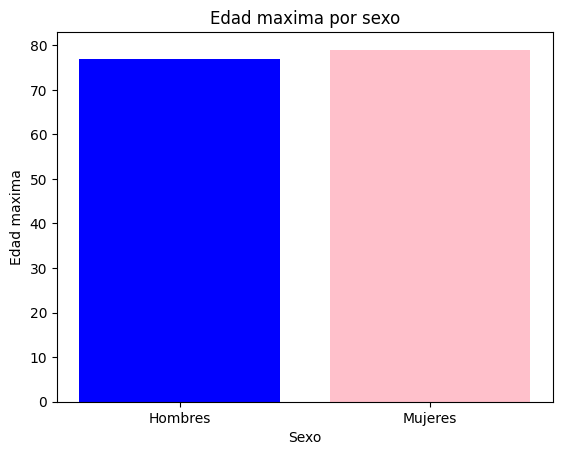

In [13]:
labels = ['Hombres', 'Mujeres']
edades_maximas = [np.max(edades_hombres), np.max(edades_mujeres)]

plt.bar(labels,edades_maximas,color=['blue','pink'])
plt.title('Edad maxima por sexo')
plt.xlabel('Sexo')
plt.ylabel('Edad maxima')
plt.show()